In [21]:
from functools import partial
import math
import numpy as np
import scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera
import pandas as pd

import matplotlib.pyplot as plt

<h1>Simulate simple ARCH(1) series</h1>
<p>ARCH(m) process is conditional on observations at previous m times</p>

In [22]:
def simulate_ARCH(T, a0, a1):
    
    # initialize sigma and price sequences
    Y = np.ndarray(T)
    sigma = np.ndarray(T)
    sigma[0] = -7.5
    
    for t in range(1, T):
        Y[t-1] = sigma[t-1] * np.random.normal(0, 1)
        sigma[t] = math.sqrt(a0 + a1 * Y[t-1] ** 2)
    
    return Y, sigma

In [23]:
Y, _ = simulate_ARCH(300, 5, 0.5)

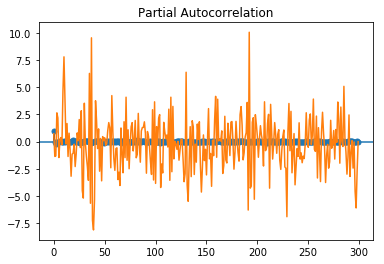

In [24]:
plt.plot(Y)
plt.show()

<h1>Auto Correlation of the Series</h1>

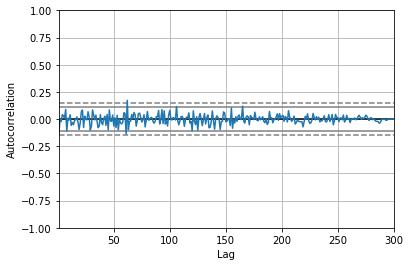

In [25]:
from pandas.plotting import autocorrelation_plot

data = pd.Series(Y)

autocorrelation_plot(data)
plt.show()


<h1>Partial AutoCorrelation Function of ARCH Series</h1>

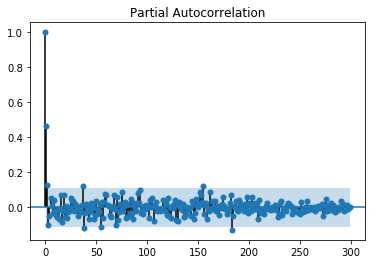

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf

Y_2 = Y * Y
plot_pacf(Y_2)